### TMDB Movie Data Analysis (ALX-T Project 1)

### Introduction
#### Dataset Description

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.(Cleaned from original data from Kaggle)

Source: (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

The dataset is divided into the following columns

- homepage
- id
- imdb_d
- original_title
- overview
- popularity
- production_companies
- budget
- revenue
- cast
- release_date
- spoken_languages
- status
- tagline
- runtime
- vote_count
- vote_average
- budget_adj
- revenue_adj

#### Note:
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Questions for Analysis

In this analysis I will attempt to explore the different attributes of our data and answer the following questions:
1. Which movie genre is the most popular over the years?

2. Which movie has the highest revenue?

3. Which year was the most number of movies released?

4. Which movie made the most profit?


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

#### Read Data using Pandas and view the first five rows

In [2]:
data = pd.read_csv(r"C:\Users\Solomon Elekwa\Documents\Data Analytics\ALX-T\tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


#### Explore the shape and qualities of the dataset

In [3]:
# View the list of columns

list(data.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

#### Note:  
The budget_adj' and 'revenue_adj' columns above are the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. We will use this to calculate adjusted profit which will enable us obtain the real and comparable profit value across the different years

In [4]:
# Let's check for null values in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2935 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [5]:
# View the number of null entries in the dataset

data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Clean up data

##### There are 10866 rows and 21 columns in the dataset.

- The columns 'homepage', 'tagline', 'keywords','overview', 'vote_average' columns are not useful for this analysis, hence will be deleted or dropped from the data frame.
- Change the adjusted budget and adjusted revenue data to integer data type (currently float).
- Augment data by calculating the profit (adjusted for inflation) using the revenue_adj and budget_adj columns.
- Drop null and NaN values from dataset

In [6]:
# Drop irrelevant data columns
data = data.drop(columns = ['homepage', 'cast','production_companies', 'imdb_id', 'tagline', 'keywords','overview', 'vote_average'])

data.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,2015,174799923.1,1.385749e+09


In [7]:
data.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
# Add profit column by subtractin adjusted budget from adjusted revenue

data['profit_adj'] = data['revenue_adj'] - data['budget_adj']
data.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,2015,174799923.1,1.385749e+09,1.210949e+09


In [9]:
# Change profit_adj, budget_adj and revenue_adj to desired datatype (int64)

data['profit_adj'] = data['profit_adj'].apply(np.int64)
data['budget_adj'] = data['budget_adj'].apply(np.int64)
data['revenue_adj'] = data['revenue_adj'].apply(np.int64)

In [10]:
data.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,2015,137999939,1392445893,1254445953
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015,137999939,348161292,210161353
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015,101199955,271619025,170419069
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015,183999919,1902723130,1718723211
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,2015,174799923,1385748801,1210948877


In [11]:
# Let's view the number of null entries in the dataset again after dropping irrelevant columns

data.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
release_year       0
budget_adj         0
revenue_adj        0
profit_adj         0
dtype: int64

In [12]:
# Let's clean the genres and director columns

data = data.dropna(subset=['genres', 'director'], axis=0, how = 'any')

In [13]:
# Check for null values again
data.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
budget_adj        0
revenue_adj       0
profit_adj        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10864
Data columns (total 14 columns):
id                10800 non-null int64
popularity        10800 non-null float64
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_date      10800 non-null object
vote_count        10800 non-null int64
release_year      10800 non-null int64
budget_adj        10800 non-null int64
revenue_adj       10800 non-null int64
profit_adj        10800 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 1.2+ MB


In [15]:
# Quick preview of our cleaned data

data.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj,profit_adj
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04
mean,65580.089259,0.648395,1.471290e+07,3.999387e+07,102.187037,218.200926,2001.292593,1.765348e+07,5.141892e+07,3.376543e+07
std,91754.186524,0.996432,3.098710e+07,1.171063e+08,30.783497,575.742676,12.817688,3.438359e+07,1.426052e+08,1.228189e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10574.000000,0.209157,0.000000e+00,0.000000e+00,90.000000,17.000000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20473.000000,0.385471,0.000000e+00,0.000000e+00,99.000000,39.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,74725.250000,0.717369,1.583121e+07,2.449119e+07,111.000000,147.000000,2011.000000,2.103337e+07,3.408462e+07,1.336304e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000,4.250000e+08,2.827124e+09,2.586237e+09


### Data Exploration

#### Question 1. Which genres are most popular over the years?

In [16]:
data_genre = data['genres'].str.get_dummies(sep='|')

In [17]:
new_genre = data_genre.sum().reset_index()

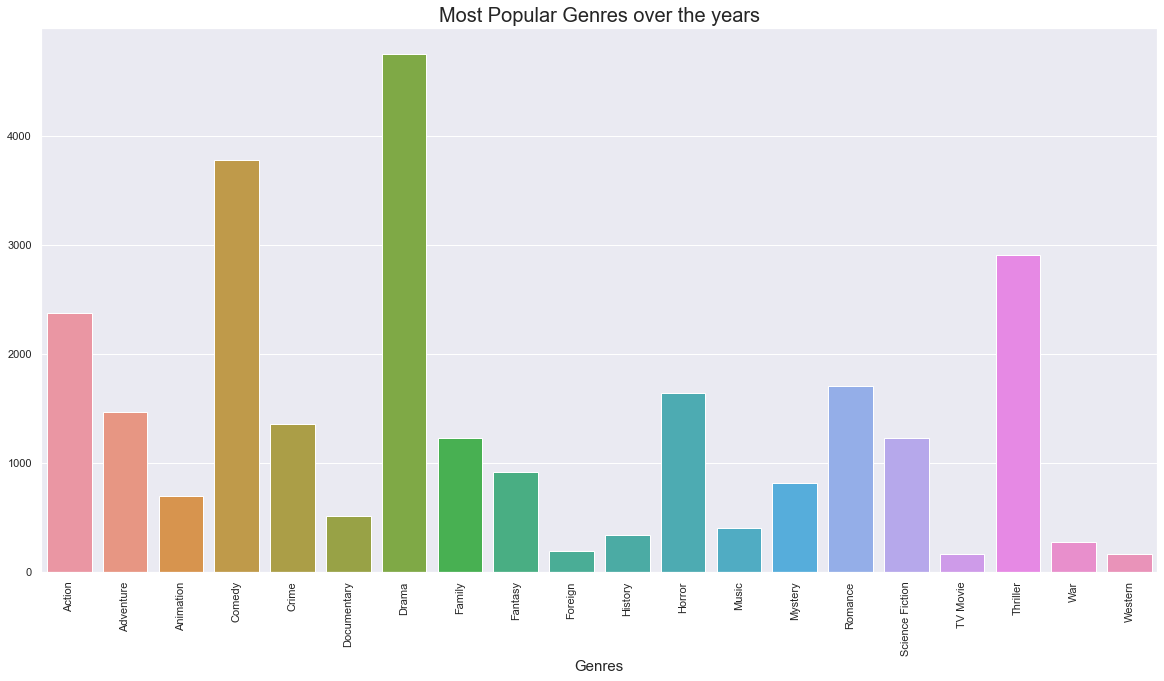

In [18]:
plt.figure(figsize =(20, 10))
sns.barplot(x=data_genre.columns, y=data_genre.sum(), data = new_genre)
plt.title('Most Popular Genres over the years', fontsize = 20)
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

#### Answer: Drama
We can see that Drama is the most popular genre across the years, followed by Comedy, Thriller and Action movies.

#### Question 2: Which movies have the highest revenues?

In [19]:
# First, what is the average revenue earned by movies over the years

avg_revenue = data['revenue_adj'].mean()
avg_rev = round(avg_revenue)

print(f"The average revenue earned was {avg_rev} million dollars")

The average revenue earned was 51418918 million dollars


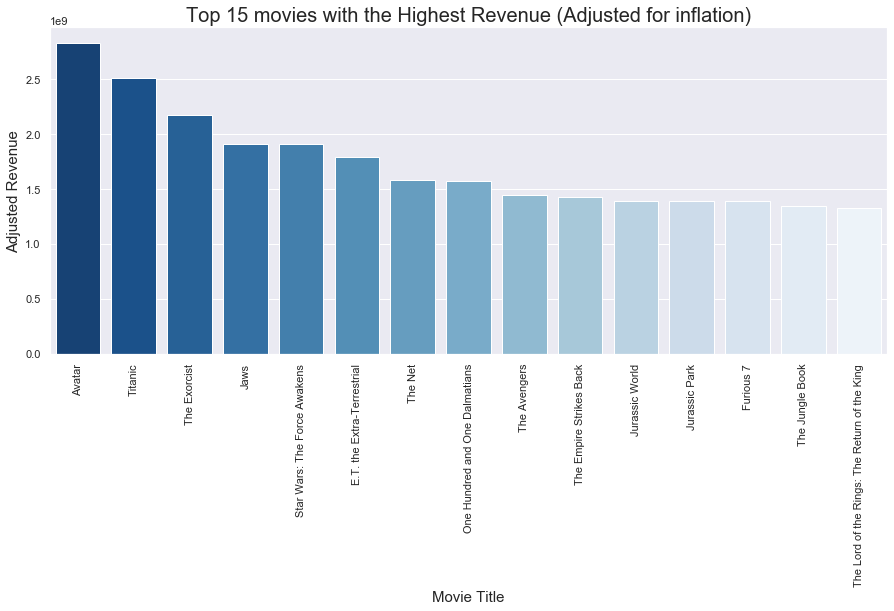

In [20]:
# Let's look at the first 15 movies with above average revenue across the years

plt.figure(figsize=(15,6))
top_rev = data[['original_title', 'revenue_adj']].sort_values('revenue_adj', ascending = False).head(15)
sns.barplot(x='original_title', y = 'revenue_adj', data=top_rev, palette='Blues_r')
plt.title('Top 15 movies with the Highest Revenue (Adjusted for inflation)', fontsize=20)
plt.xlabel('Movie Title', fontsize=15)
plt.ylabel('Adjusted Revenue', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Answer: Avatar
From the above we can tell that the movie with the highest revenue(adjusted for inflation) is Avatar closely followed by Titanic

#### Question 3: Which year was the most number of movies released?

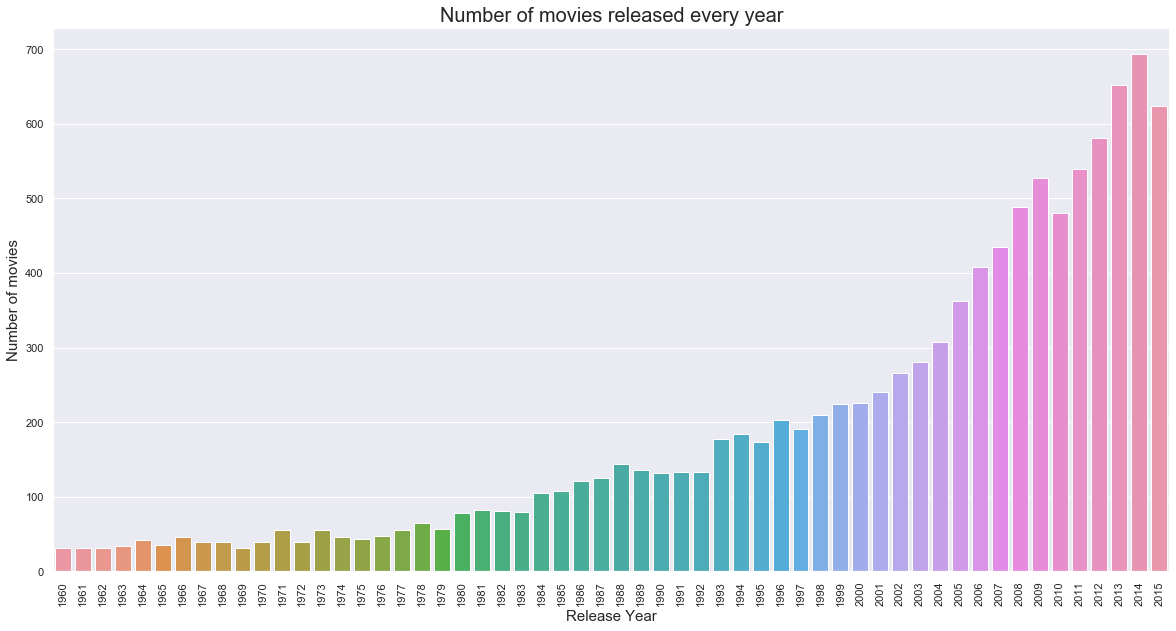

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data['release_year'])
plt.title('Number of movies released every year', fontsize=20)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Answer: 2014
We can see from the table that the highest number of movies were released in 2014

In [22]:
print("In 2014 about {} movies were released.".format(data['release_year'][data["release_year"]==2014].count()))

In 2014 about 694 movies were released.


#### Question 4: Which movie made the most profit?

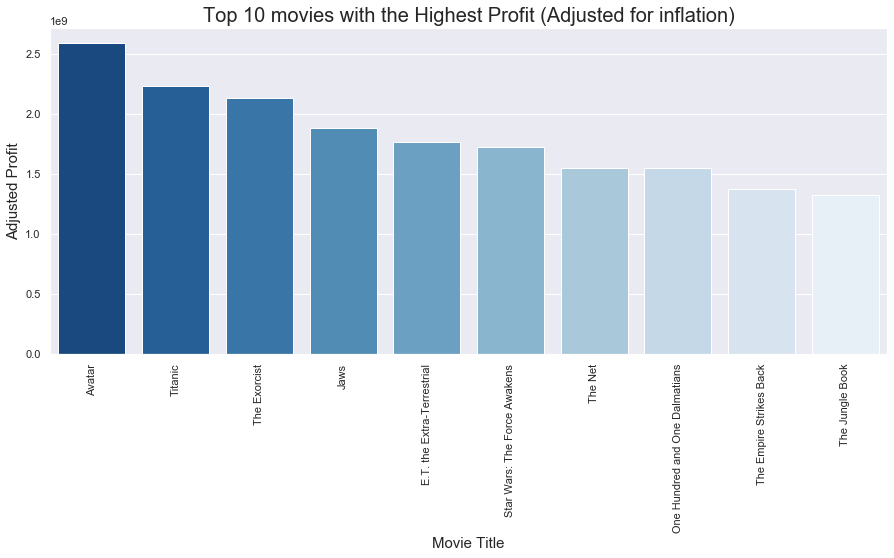

In [23]:
# Let's look at the top 10 most profitable movies across the years

plt.figure(figsize=(15,6))
top_prof = data[['original_title', 'profit_adj']].sort_values('profit_adj', ascending = False).head(10)
sns.barplot(x='original_title', y = 'profit_adj', data=top_prof, palette='Blues_r')
plt.title('Top 10 movies with the Highest Profit (Adjusted for inflation)', fontsize=20)
plt.xlabel('Movie Title', fontsize=15)
plt.ylabel('Adjusted Profit', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Answer: Avatar
From the above we can see that the movie with the highest profit(adjusted for inflation) is Avatar followed by Titanic



### Conclusions



We set out to explore a dataset which is made up of information on about 10,000 movies produced between 1960 to 2016. 

We looked at the various attributes and shape ofour data set and embarked on data cleaning afterwards, dropping unnecessary columns that were not needed in answering our analysis questions. The dataset contained 10866 rows and 21 columns.

In cleaning our data and getting it ready for explorations:
- The columns 'homepage', 'tagline', 'keywords','overview', 'vote_average' columns are not useful for this analysis, hence were dropped from the dataset.
- The adjusted budget and adjusted revenue data were converted to integer data type (currently float).
- We augment our data by calculating the profit (adjusted for inflation) using the revenue_adj and budget_adj columns and adding an Adjusted profit "profit_adj" column to our dataset.
- We dropped null (NaN) values from 'director' and 'genre' columns

- We were left with 10800 rows and 14 columns


#### Summary
Based on our analysis we discovered the following:

1. Drama is the most popular movie genre across the years, followed by Comedy, Thriller and Action movies.
2. The movie with the highest revenue(adjusted for inflation) is Avatar closely followed by Titanic
3. The highest number of movies were released in 2014
4. The movie with the highest profit(adjusted for inflation) is Avatar


#### Limitations of your exploration 

A major limitation to our analysis and data exploration was the presence of missing data, and deficiencies in data measurements and a rather too broad formualtion of research questions. Further study and analysis based on a narrower and more indepth analysis questions is recommended.
